CNN
  -  convolution
  - 이미지의 특징(성) 추출

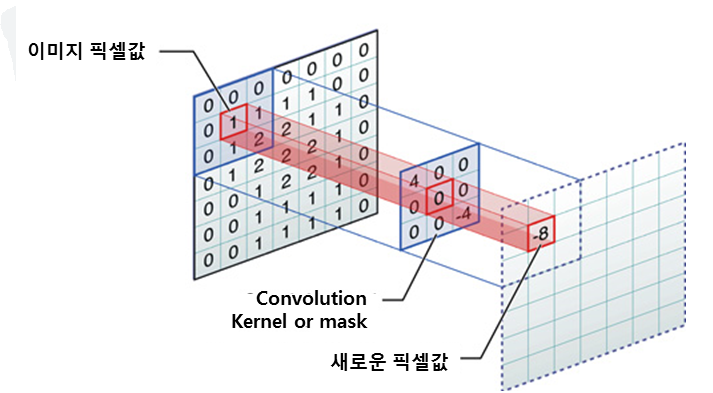

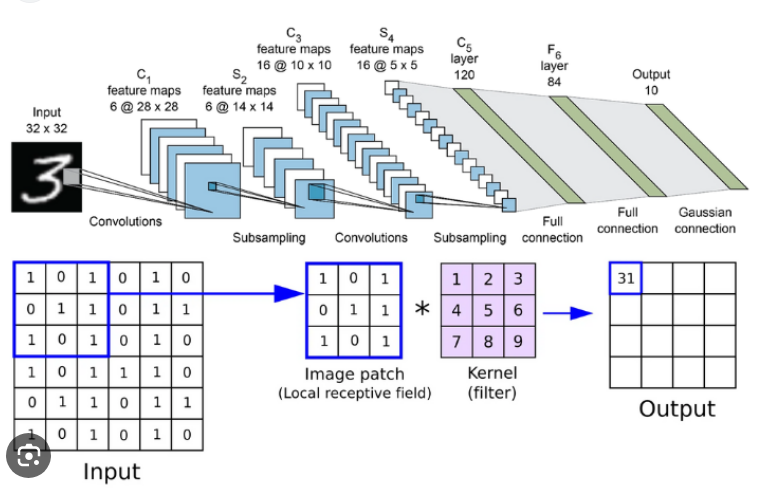

In [1]:
from tensorflow import keras
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()
x_train_sacled = x_train / 255.0
x_test_sacled = x_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train_sacled,y_train,random_state=42)

In [3]:
x_train.shape

(45000, 28, 28)

In [4]:
model = keras.Sequential()

In [5]:
model.add( keras.layers.Conv2D(32,kernel_size=3,activation='relu',input_shape = (28,28,1) )  )
model.add( keras.layers.MaxPool2D())
model.add( keras.layers.Flatten())
model.add( keras.layers.Dense(100,activation='relu'))
model.add( keras.layers.Dense(50,activation='relu'))
model.add( keras.layers.Dense(10,activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                        

In [6]:
x_train.shape

(45000, 28, 28)

In [7]:
x_train_reshape = x_train.reshape(-1,28,28,1)
x_val_reshape = x_val.reshape(-1,28,28,1)

In [11]:
from keras.engine.training import optimizer
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
est = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(x_train_reshape,y_train,epochs=200,validation_data=(x_val_reshape,y_val),  callbacks=[est])

Epoch 1/200
1407/1407 [==============================] - 10s 6ms/step - loss: 0.1175 - accuracy: 0.9564 - val_loss: 0.3296 - val_accuracy: 0.9017
Epoch 2/200
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1001 - accuracy: 0.9635 - val_loss: 0.2924 - val_accuracy: 0.9147
Epoch 3/200
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0843 - accuracy: 0.9686 - val_loss: 0.3237 - val_accuracy: 0.9096
Epoch 4/200
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0743 - accuracy: 0.9730 - val_loss: 0.3503 - val_accuracy: 0.9089
Epoch 5/200
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0637 - accuracy: 0.9763 - val_loss: 0.3695 - val_accuracy: 0.9083


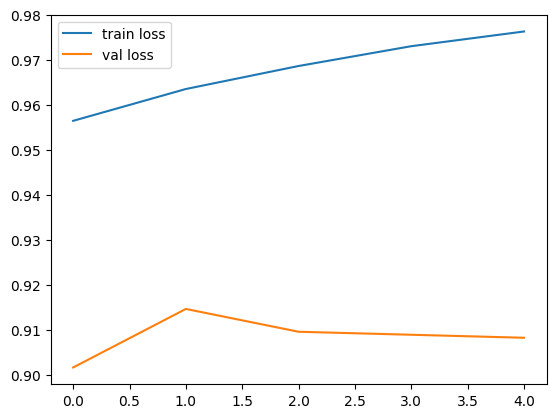

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train loss')
plt.plot(history.history['val_accuracy'], label='val loss')
plt.legend()
plt.show()